<a href="https://colab.research.google.com/github/juligomez-web/Sys/blob/main/Primer_Parcial_Julio_Cesar_Gomez_Copia_de_1_PARCIAL_SYS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARCIAL #1: SEÑALES Y SISTEMAS 2025_II**

JULIO CESAR GOMEZ

**1 La distancia media entre dos señales periódicas x1(t) ∈ ℝ,ℂ y x2(t) ∈ ℝ,ℂ; se puede expresar a partir de la potencia media de la diferencia entre ellas:**

d²(x1, x2) = P̄{x1−x2} = lim{T→∞} (1/T) ∫_T |x1(t) − x2(t)|² dt

Sea x1(t) y x2(t) dos señales definidas como:

x1(t) = A·e^(−j n ω0 t)

x2(t) = B·e^( j m ω0 t)

con ω0 = 2π/T; T, A, B ∈ ℝ⁺ y n, m ∈ ℤ.

Determine la distancia entre las dos señales. Compruebe sus resultados con Python.

**SOLUCIÓN**

Si la distancia media entre las 2 señales es:

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt$

Pero nosotros sabemos que:

$\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt=\overline{P}_e$

Y $\overline{P}_e$ se puede calcular también por:

$\overline{P}_e=\overline{P}_{x_1}-\frac{2}{T}∫_Tx_1(t)x_2^*(t)dt+\overline{P}_{x_2}$

Es posible calcular cada una por a parte asi:

In [1]:
import sympy as sym #importamos sympy para hacer integrales simbolicas
from IPython.display import display #importo display para mostrar resultados bonitos

T = sym.Symbol("T", real=True, positive=True) #real positivo
A = sym.Symbol("A", real=True, positive=True) #real positivo
n = sym.Symbol("n", integer=True) #entero
t = sym.Symbol("t")
omega = 2*sym.pi/T #creamos las variables simbolicas T,A,n,t y definimos nuestra fecuencia angular omega

x1 = A*sym.exp(-sym.I * n * omega * t)
x1_conj = sym.conjugate(x1)

display(x1 , x1_conj)

A*exp(-2*I*pi*n*t/T)

A*exp(2*I*pi*n*conjugate(t)/T)

In [2]:
px1 = (1/T) * sym.integrate(x1*x1_conj,(t, -T/2, T/2)) #hacemos la integral simbolica

display(px1) #que nos muestre el resultado

A**2

In [7]:
#Fue un éxito, ahora hagamos lo propio con x2
B = sym.Symbol("B", real=True, positive=True) #real positivo
m = sym.Symbol("m", integer=True) #entero

x2 = B*sym.exp(-sym.I * m * omega * t)
x2_conj = sym.conjugate(x2)

In [5]:
px2 = (1/T) * sym.integrate(x2*x2_conj,(t, -T/2, T/2)) #hacemos la integral simbolica

display(px2) #que nos muestre el resultado

B**2

Listas las integrales sencillas, ahora vamos a intentar con la integral que tiene 2 casos posibles:

In [ ]:
integ = -(2/T)*sym.integrate(x1*x2_conj,(t, -T/2, T/2)) #integral simbolica

display(integ) #a ver

-2*Piecewise((A*B*T, Eq(m, n) | (Eq(m, 0) & Eq(m, n)) | (Eq(m, 0) & Eq(n, 0)) | (Eq(m, n) & Eq(n, 0)) | (Eq(m, 0) & Eq(m, n) & Eq(n, 0))), (-I*A*B*T*exp(I*pi*m)/(2*pi*m*exp(I*pi*n) - 2*pi*n*exp(I*pi*n)) + I*A*B*T*exp(-I*pi*m)/(2*pi*m*exp(-I*pi*n) - 2*pi*n*exp(-I*pi*n)), True))/T

Resulta sencillo notar que en últimas:

# Caso 1:
$n = -m$ o $n=0$ y $m=0$

$-\frac{2ABT}{T}=-2AB$

# Caso 2:
$n \neq -m$, $n \neq 0$ y $m \neq 0$

$-\frac{2(-\frac{iABTe^{iπm}}{2πme^{iπn}-2πne^{iπn}}+\frac{iABTe^{-iπm}}{2πme^{-iπn}-2πne^{-iπn}})}{T}=0$

Como el problema nos dice que

$d^2(x_1,x_2)=\overline{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} ∫_T |x_1(t)-x_2(t)|^2dt=\overline{P}_e$

Luego

$d(x_1,x_2)=\sqrt{\overline{P}_e}$

Es decir que si $n = -m$ o $n=0$ y $m=0$

$d(x_1,x_2)=\sqrt{\overline{P}_e}=\sqrt{A^2+B^2-2AB}$

Y si $n \neq -m$, $n \neq 0$ y $m \neq 0$

$d(x_1,x_2)=\sqrt{\overline{P}_e}=\sqrt{A^2+B^2}$


**2.Encuentre la señal en tiempo discreto al utilizar un conversor
 análogo digital con frecuencia de muestreo de 5kHz y 4 bits
 de capacidad de representación, aplicado a la señal continua:**

 x(t) = 3cos (1000πt) + 5sin (3000πt) + 10cos (11000πt)

Realizar la simulación del proceso de discretización (inclu
yendo al menos tres periodos de x(t)). En caso de que la dis
cretización no sea apropiada, diseñe e implemente un con
versor adecuado para la señal estudiada.

**SOLUCIÓN**

Para empezar calculamos el periodo de la señal $x(t)$, el cual es el minimo común multiplo de los periodos de las otras señales:

$m.c.m(\frac{1}{500},\frac{1}{1500},\frac{1}{5500})=\frac{1}{M.c.d(500,1500,5500)}=\frac{1}{500}$

Con lo que la frecuencia de la señal es $500 Hz$

Text(0, 0.5, '$x(t)$')

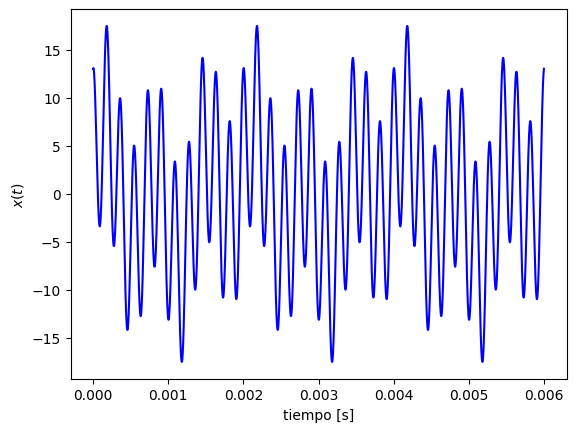

In [6]:
import numpy as np #importamos numpy para simular señales discretas
import matplotlib.pyplot as plt #librería para gráficas básicas en python

tin=0 #tiempo inicial
f=500 # frecuencia de la señal
T=1/f #periodo de la señal
tfin=T*3 #tiempo final, usamos tres veces el periodo obtenido ya que queremos ver 3 ciclos
fcont=f*5000 #vamos a simular como luce en tiempo continuo la señal para hacer la comparación
tcont=1/fcont
tveccont = np.arange(tin, tfin+tcont, tcont) #ponemos tiempo final más t muestreo para que si tome los 3 ciclos, ya que si no el ultimo queda incompleto
xcont= 3*np.cos(1000*np.pi*tveccont) + 5*np.sin(3000*np.pi*tveccont) + 10*np.cos(11000*np.pi*tveccont) #nuestra señal en continuo
plt.plot(tveccont,xcont,"b-",label="señal pedida") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Ahora vamos a ver como luce la señal discretizada con la condicion dada de $F_s=5000Hz$:

Text(0, 0.5, '$x(t)$')

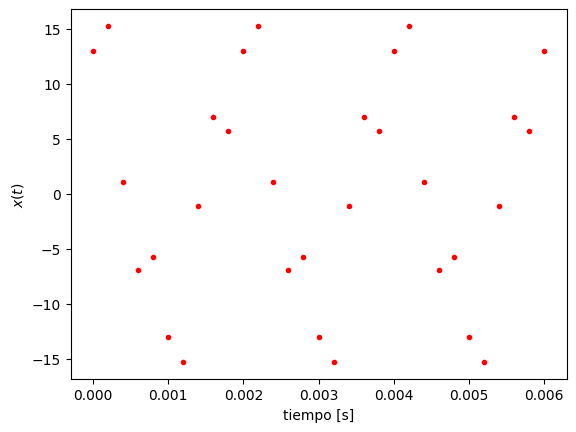

In [ ]:
Fs=5000
Ts=1/5000
tvecdis1 = np.arange(tin, tfin+Ts, Ts)
xdis1 = 3*np.cos(1000*np.pi*tvecdis1) + 5*np.sin(3000*np.pi*tvecdis1) + 10*np.cos(11000*np.pi*tvecdis1) #nuestra señal en discreto con la frecuencia de muestreo que nos dieron
plt.plot(tvecdis1,xdis1,"r.",label="señal discretizada con Fs=5000Hz") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

**CONVERSOR** Aqui se nota que como la frecuencia de muestreo que nos dieron no cumple el Teorema de Nyquist, lo que alcanza a ver nuestro conversor de la señal es muy minimo, y es insuficiente para reconstruir la señal.

Text(0, 0.5, '$x_{cs}(t)$')

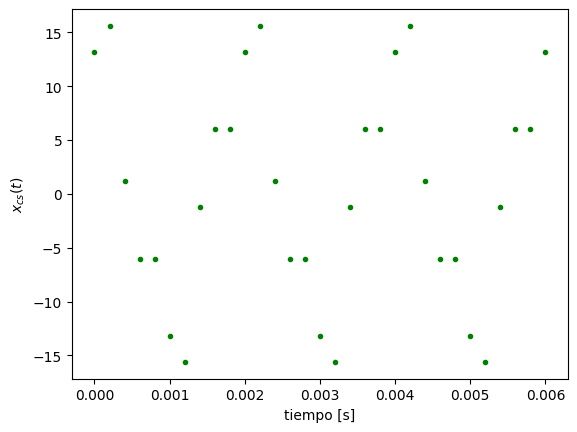

In [ ]:
#muy bien, ahora digitalizamos la señal
from scipy.spatial.distance import cdist #esto se copio y se pego de uno de los cuadernos facilitados por el profesor, usaremos las funciones definidas por él para nuestra solución

vcuant=np.linspace(-18,18,2**4) #creamos un vector que define que valores puede tomar nuestra función en el eje y, el número de muestras viene dado por 2**nbits, en nuestro problema, 4 bits
#función cuantización punto a punto

#esta función se copio y se pego como venia de un cuaderno facilitado por el profe
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]
for i in range(xdis1.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq = my_cuantizador(xdis1[i],vcuant)
   else:
     senalq = np.append(senalq,my_cuantizador(xdis1[i],vcuant))

plt.plot(tvecdis1,senalq,"g.",label="señal digitalizada con Fs=5500Hz y 4 bits") #a ver como quedo x3
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Ahora vamos a proponer una solución mejor al problema: necesitamos una mayor frecuencia de muestreo que por lo menos cumpla Nyquist, es decir:

$F_s \geq 2Fmax$

Como la $Fmax$ de la señal es $5500Hz$, para que la señal digitalizada luzca bien proponemos un $Fs=200*Fmax$

Text(0, 0.5, '$x(t)$')

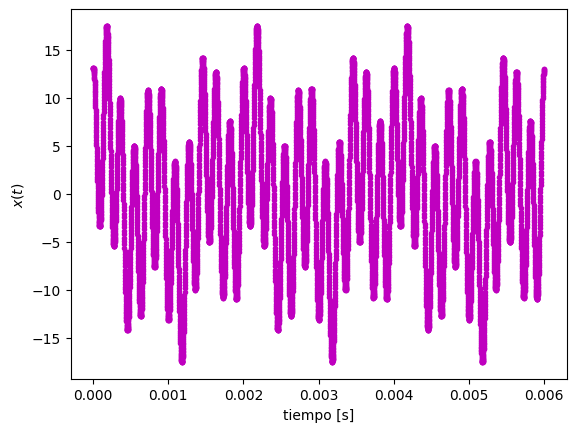

In [ ]:
Fmax = 5500
Fs2 = 200*Fmax
Ts2 = 1/Fs2
tvecdis2 = np.arange(tin, tfin+Ts2, Ts2)
xdis2 = 3*np.cos(1000*np.pi*tvecdis2) + 5*np.sin(3000*np.pi*tvecdis2) + 10*np.cos(11000*np.pi*tvecdis2) #nuestra señal en discreto con la frecuencia de muestreo que proponemos
plt.plot(tvecdis2,xdis2,"m.",label="señal discretizada con Fs=200*Fmax") #a ver como quedo
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')

Como vemos, con esta nueva frecuencia de muestreo podemos ver la señal por completo, ahora si la cuantizamos nos queda:

Text(0, 0.5, '$x_{cs}(t)$')

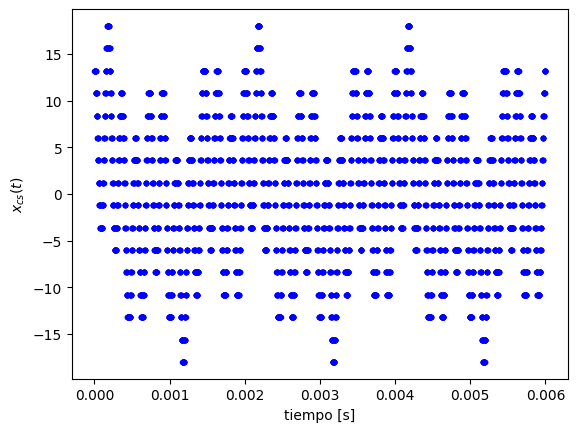

In [ ]:
for i in range(xdis2.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq2 = my_cuantizador(xdis2[i],vcuant)
   else:
     senalq2 = np.append(senalq2,my_cuantizador(xdis2[i],vcuant))

plt.plot(tvecdis2,senalq2,"b.",label="señal digitalizada con Fs=200*Fmax y 4 bits") #a ver como quedo x1000
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

Al ver la señal digitalizada no es posible visualizar como era originalmente, para hacerla más fiel a la original seria necesario utilizar más bits, con un incremento de tan solo 1 bit se obtendria:

Text(0, 0.5, '$x_{cs}(t)$')

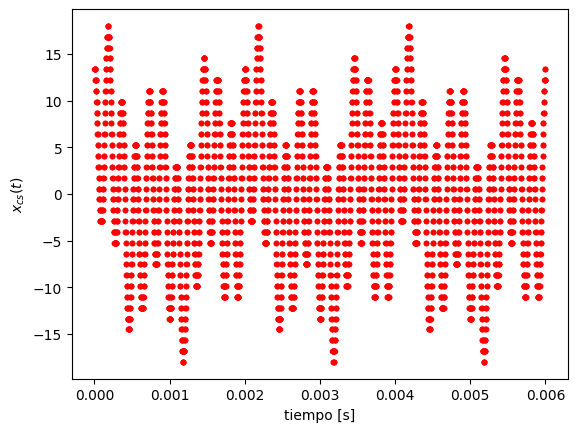

In [ ]:
vcuant2=np.linspace(-18,18,2**5) #creamos un vector que define que valores puede tomar nuestra función en el eje y, el número de muestras viene dado por 2**nbits, en nuestra solución, 5 bits
for i in range(xdis2.shape[0]): #este for se copio y se pego tal cual del mismo cuaderno, es para que vaya comparando cada elemento de la señal discretizada con el vector que define que estados puede tomar la señal y vaya generando un vector con los valores digitalizados
   if i==0: #primera muestra
     senalq3 = my_cuantizador(xdis2[i],vcuant2)
   else:
     senalq3 = np.append(senalq3,my_cuantizador(xdis2[i],vcuant2))

plt.plot(tvecdis2,senalq3,"r.",label="señal digitalizada con Fs=200*Fmax y 5 bits") #a ver como quedo x10000
plt.xlabel('tiempo [s]')
plt.ylabel('$x_{cs}(t)$')

**3  Sea x(t) la segunda derivada de la señal x(t), donde t ∈
 [ti, tf]. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:**

 $$cn=\frac{1}{(t_i-t_f)n^2 \omega_0 ^2}\int_{t_i}^{t_f}x''(t)e^{-j n \omega_0 t}dt n ∈ Z$$

¿Cómo se pueden calcular los coeficientes an y bn desde
 x"(t) en la serie trigonométrica de Fourier?

**SOLUCIÓN PDF ADJUNTO CORREO**

*   Elemento de lista
*   Elemento de lista



**4** Encuentre el espectro de Fourier, su parte real,
 imaginaria, magnitud, fase y el error relativo para
 n∈{0,±1,±2,±3,±4,±5}, a partir de x(t) para la
 señal x(t) en la Figura 1 . Compruebe el espectro obtenido
 con la estimación a partir de x"(t). Presente las simulaciones
 de Python respectivas.

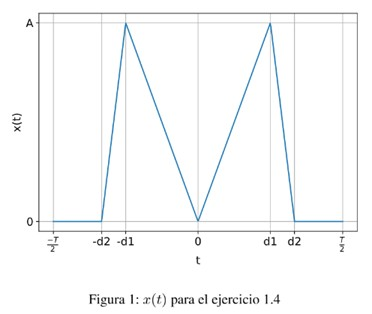